# Regresión lineal con descenso del gradiente y selección de características

[descripcion]

## 1. Exploración y limpieza del dataset

### 1.1. Carga del Dataset y configuracion del entorno

In [7]:
# Install dependencies as needed:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error



In [8]:
# Load the data
data = pd.read_csv('data.csv')

# Print the first few rows of the data
print(data.head())

   Square_Footage  Num_Bedrooms  Num_Bathrooms  Year_Built  Lot_Size  \
0            1360             2              1        1981  0.599637   
1            4272             3              3        2016  4.753014   
2            3592             1              2        2016  3.634823   
3             966             1              2        1977  2.730667   
4            4926             2              1        1993  4.699073   

   Garage_Size  Neighborhood_Quality   House_Price  
0            0                     5  2.623829e+05  
1            1                     6  9.852609e+05  
2            0                     9  7.779774e+05  
3            1                     8  2.296989e+05  
4            0                     8  1.041741e+06  


### 1.2. Transformacion del Dataset

In [9]:
# 1.2 Revisión de valores nulos
print("\nValores nulos por columna:")
print(data.isnull().sum())


Valores nulos por columna:
Square_Footage          0
Num_Bedrooms            0
Num_Bathrooms           0
Year_Built              0
Lot_Size                0
Garage_Size             0
Neighborhood_Quality    0
House_Price             0
dtype: int64


### 1.3. Graficos Resultantes

<Figure size 1500x1000 with 0 Axes>

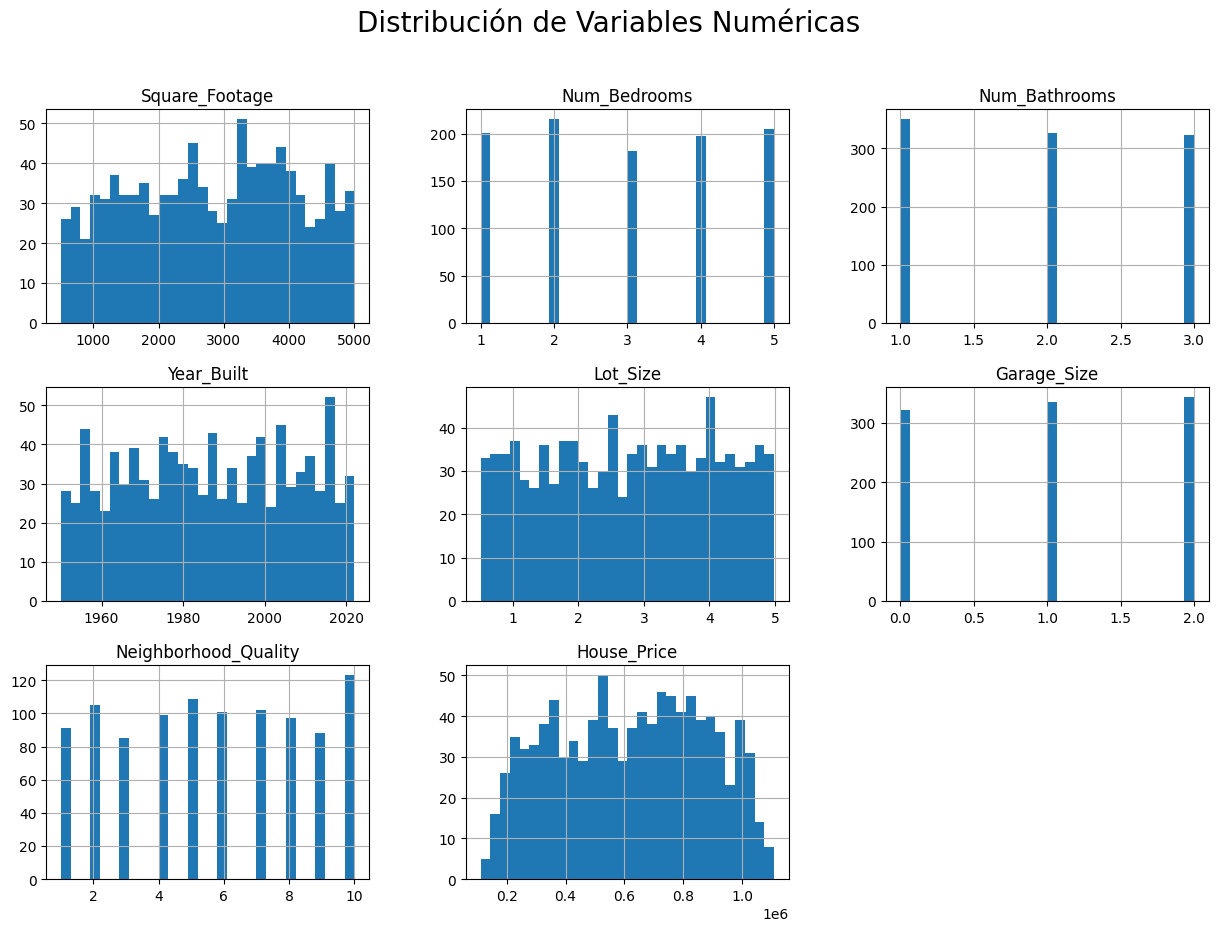

In [10]:
# 1.3 Distribución de variables numéricas
plt.figure(figsize=(15, 10))
data.hist(bins=30, figsize=(15, 10))
plt.suptitle('Distribución de Variables Numéricas', fontsize=20)
plt.show()

### 1.4. Deteccion de outliers

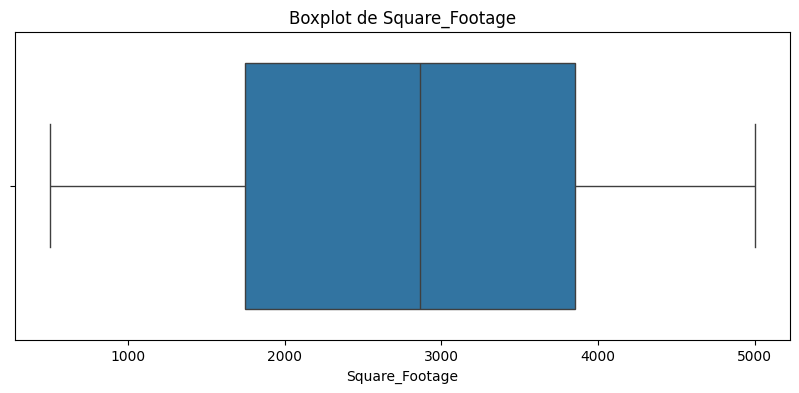

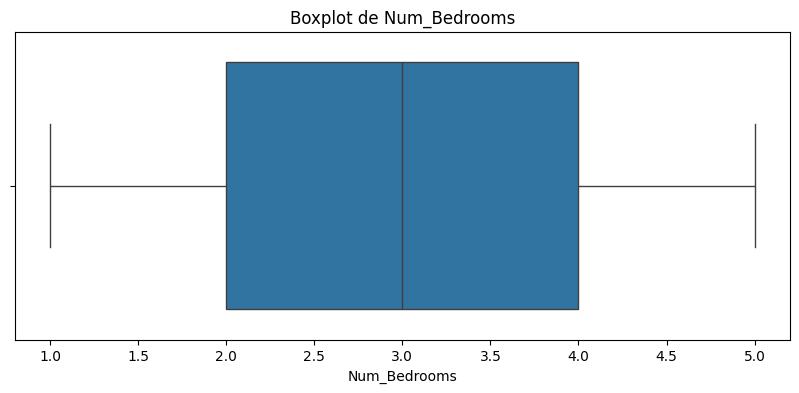

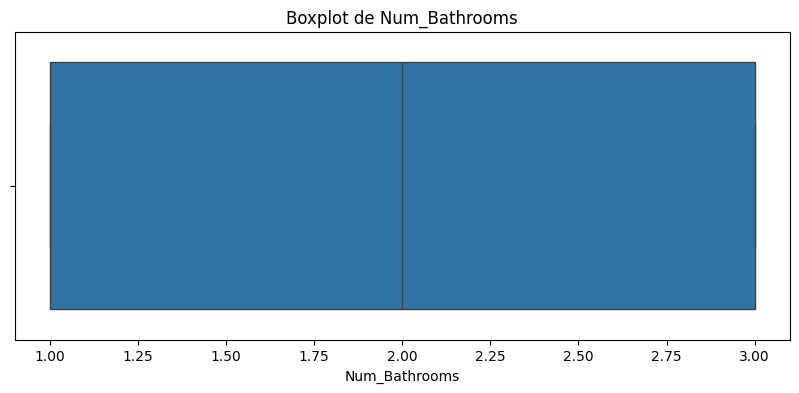

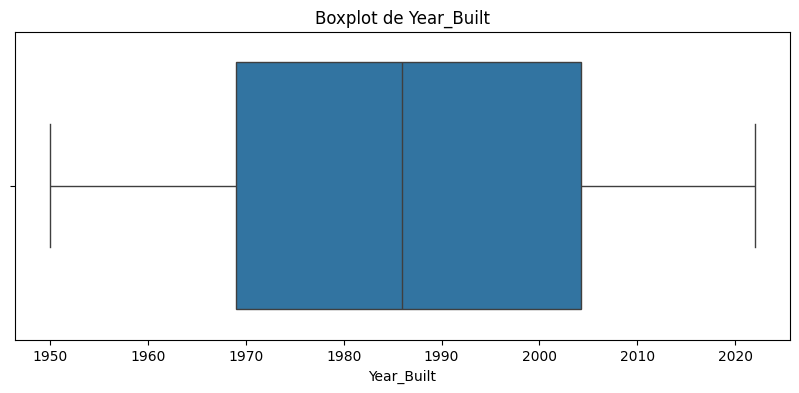

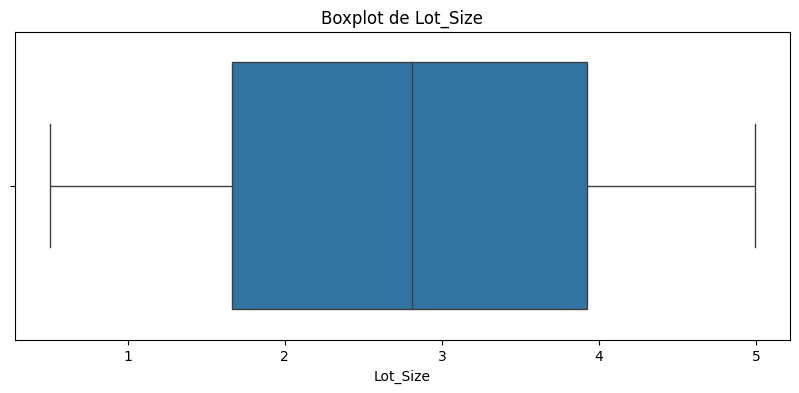

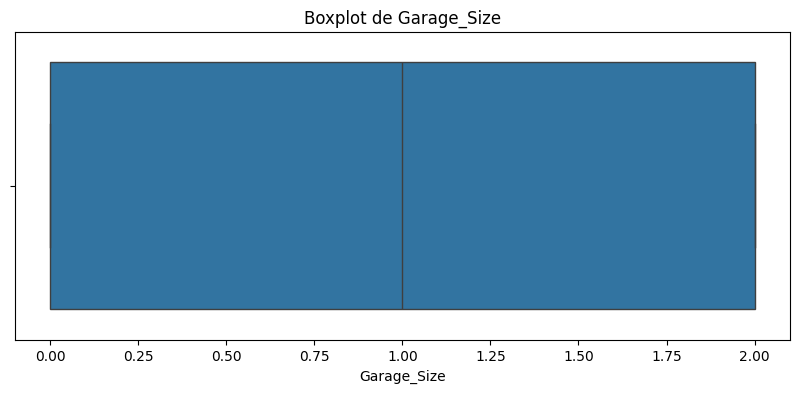

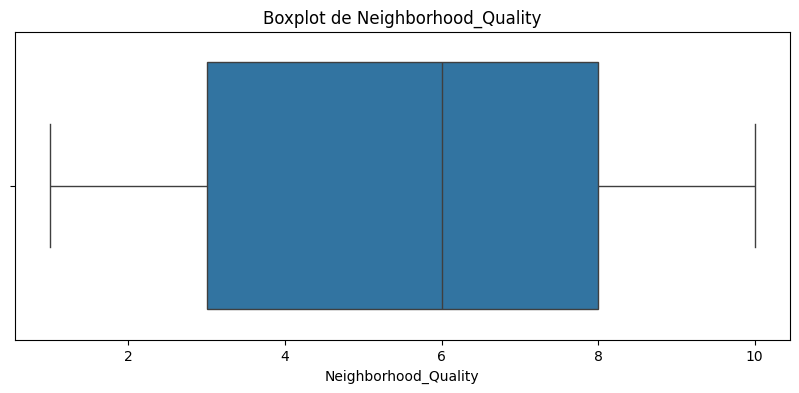

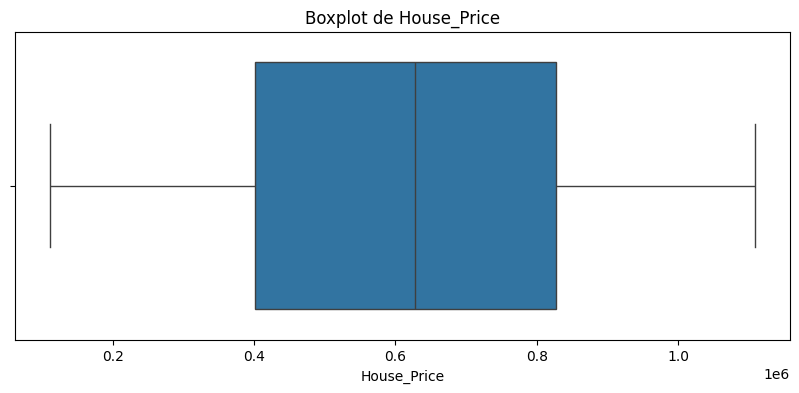

In [13]:
# 1.4 Boxplots para detectar outliers
for column in data.select_dtypes(include=['int64', 'float64']).columns:
    plt.figure(figsize=(10, 4))
    sns.boxplot(x=data[column])
    plt.title(f'Boxplot de {column}')
    plt.show()


### 1.5. Manejo de Outliers usando IQR

In [16]:
# 1.5 Manejo de Outliers usando IQR
for column in data.select_dtypes(include=['int64', 'float64']).columns:
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    data = data[(data[column] >= lower_bound) & (data[column] <= upper_bound)]

print("\nDataset después de eliminar outliers:")
print(data.describe())


Dataset después de eliminar outliers:
       Square_Footage  Num_Bedrooms  Num_Bathrooms   Year_Built     Lot_Size  \
count     1000.000000   1000.000000    1000.000000  1000.000000  1000.000000   
mean      2815.422000      2.990000       1.973000  1986.550000     1.261849   
std       1255.514921      1.427564       0.820332    20.632916     0.381552   
min        503.000000      1.000000       1.000000  1950.000000     0.409496   
25%       1749.500000      2.000000       1.000000  1969.000000     0.980559   
50%       2862.500000      3.000000       2.000000  1986.000000     1.337561   
75%       3849.500000      4.000000       3.000000  2004.250000     1.593982   
max       4999.000000      5.000000       3.000000  2022.000000     1.789975   

       Garage_Size  Neighborhood_Quality   House_Price  
count  1000.000000           1000.000000  1.000000e+03  
mean      1.022000              5.615000  6.188610e+05  
std       0.814973              2.887059  2.535681e+05  
min       0.

### 1.6. Transformacion de variables

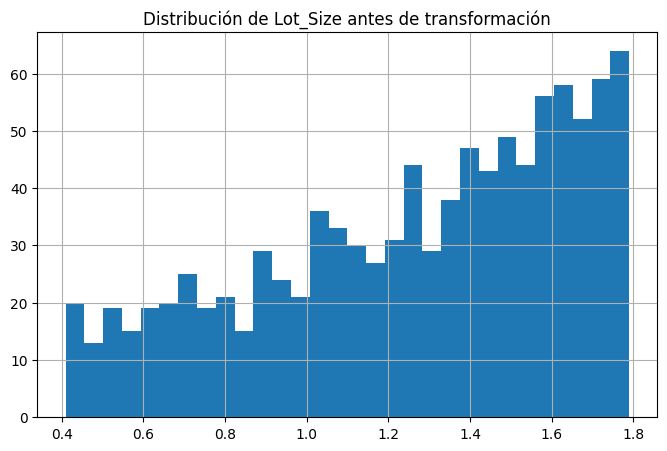

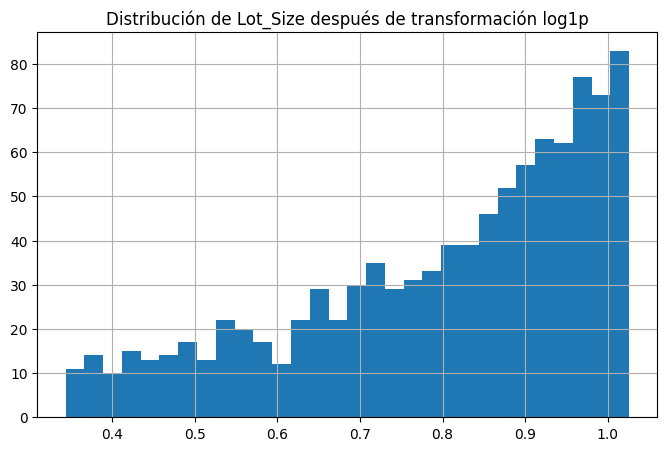

In [ ]:
# 1.6 Transformación de Variables *Esto es opcional solo si existe sesgo en la distribución de las variables
# Revisamos la distribución de Lot_Size
plt.figure(figsize=(8,5))
data['Lot_Size'].hist(bins=30)
plt.title('Distribución de Lot_Size antes de transformación')
plt.show()

# Aplicamos transformación logarítmica si es necesario
data['Lot_Size'] = np.log1p(data['Lot_Size'])

plt.figure(figsize=(8,5))
data['Lot_Size'].hist(bins=30)
plt.title('Distribución de Lot_Size después de transformación log1p')
plt.show()


## 2. Selección de características

### 2.1. Manejo de Features Ordinales

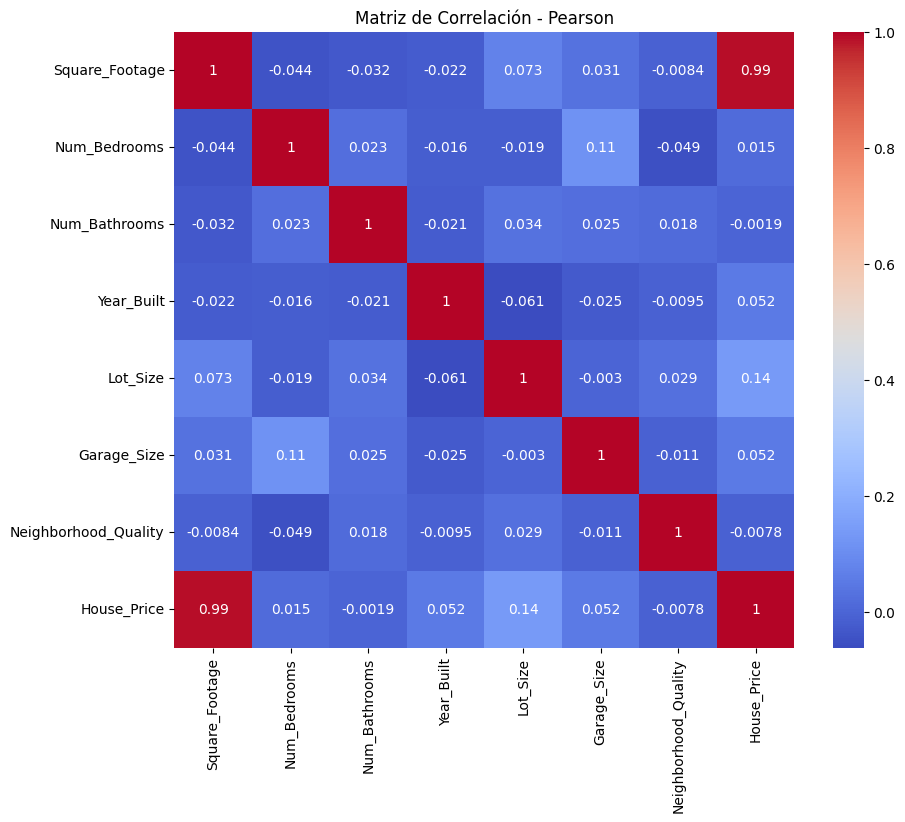

In [18]:
# 2.1 Análisis de correlación - Pearson
corr_pearson = data.corr(method='pearson')
plt.figure(figsize=(10, 8))
sns.heatmap(corr_pearson, annot=True, cmap='coolwarm')
plt.title('Matriz de Correlación - Pearson')
plt.show()


### 2.2. Análisis de Correlación para Features Numéricos

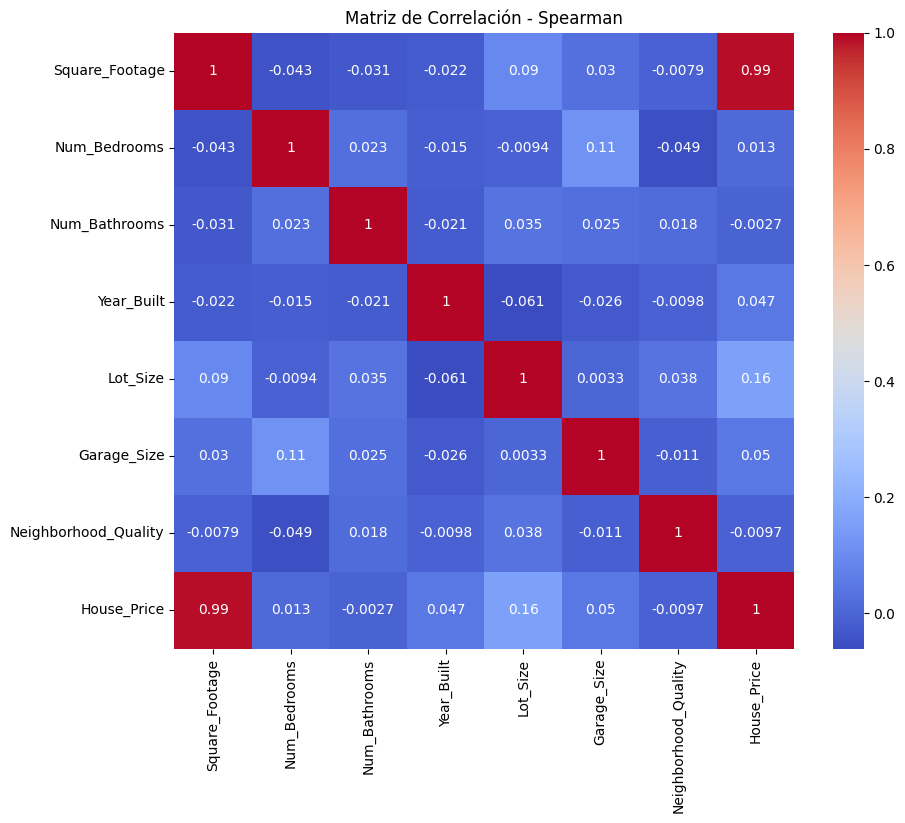

In [19]:
# 2.2 Análisis de correlación - Spearman
corr_spearman = data.corr(method='spearman')
plt.figure(figsize=(10, 8))
sns.heatmap(corr_spearman, annot=True, cmap='coolwarm')
plt.title('Matriz de Correlación - Spearman')
plt.show()


### 2.3. Aplicar Transformaciones a los Datos

## 3. Implementación de regresión lineal con descenso del gradiente

## 4. Análisis de sesgo y varianza